In [3]:
#for data handling
import pandas as pd 

#for array manuplation
import numpy as np 

#for graph plot
import matplotlib.pyplot as plt

#for drawing highly attractive and informative statical graphics
import seaborn as sns 

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [4]:
dataset = pd.read_csv("C:\\Users\\data\\Desktop\\Credit Card Fraud Detection\\creditcard.csv")

In [5]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,128,-0.549716,0.907665,1.597949,1.298978,0.587993,0.032376,0.754252,-0.306614,-0.269297,...,-0.011485,0.417706,-0.265218,0.129561,-0.228241,-0.304780,-0.190978,-0.087081,10.00,0
195,128,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,...,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,8.80,0
196,130,-0.485238,0.658497,1.949967,1.249695,0.426410,0.231513,0.585115,0.029163,-0.520297,...,0.007290,0.328244,-0.232563,0.225572,0.025892,-0.247395,-0.025381,-0.118565,5.97,0
197,130,1.353283,-0.694900,0.970826,-0.426559,-1.417263,-0.505710,-0.932069,-0.083957,-0.224208,...,0.284341,0.993434,-0.164893,0.474257,0.623848,-0.006750,0.046026,0.022043,15.93,0


In [6]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
dataset.describe().round(decimals=2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00,...,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.0
mean,64.71,-0.24,0.16,0.83,0.36,-0.05,0.35,0.23,-0.01,0.02,...,0.02,-0.02,-0.05,0.06,0.15,-0.01,0.01,-0.03,93.35,0.0
std,35.86,1.48,1.36,1.14,1.39,1.27,1.38,0.86,0.73,0.82,...,0.47,0.63,0.45,0.60,0.41,0.51,0.39,0.31,321.08,0.0
min,0.00,-6.09,-12.11,-5.69,-4.52,-6.63,-2.15,-2.71,-3.81,-2.09,...,-0.92,-2.78,-3.55,-1.69,-1.12,-1.24,-2.38,-1.65,0.75,0.0
25%,35.00,-0.92,-0.12,0.18,-0.47,-0.62,-0.51,-0.16,-0.17,-0.40,...,-0.20,-0.47,-0.16,-0.37,-0.10,-0.33,-0.05,-0.05,6.60,0.0
50%,68.00,-0.38,0.25,0.86,0.52,-0.11,-0.03,0.15,0.05,-0.04,...,-0.04,-0.00,-0.05,0.13,0.16,-0.09,0.02,0.02,20.53,0.0
75%,92.50,1.11,0.85,1.53,1.22,0.43,0.50,0.64,0.28,0.33,...,0.10,0.35,0.07,0.44,0.47,0.21,0.09,0.06,67.63,0.0
max,131.00,1.49,4.85,3.56,4.08,3.28,5.12,4.81,1.59,4.01,...,2.27,1.46,2.46,1.22,1.14,3.07,2.49,1.58,3828.04,0.0


In [8]:
#print list of data
print('columns : ', list(dataset))

#print length of list
print('Number of columns : ', len(list(dataset)))

columns :  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Number of columns :  31


In [9]:
#1 denotes fraud
#0 denotes genuine

n_genuine = len(dataset[dataset['Class']==0])
n_fraud = len(dataset[dataset['Class']==1])

In [10]:
print('Number of Genuine Transactions : ', n_genuine)
print('Number of Fraud Transactions : ', n_fraud)

Number of Genuine Transactions :  199
Number of Fraud Transactions :  0


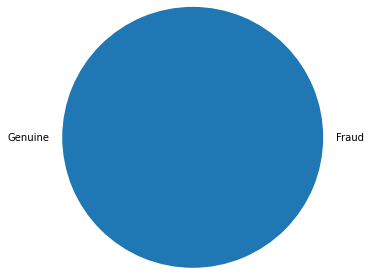

In [11]:
plt.pie([n_genuine, n_fraud], labels=['Genuine', 'Fraud'], radius=1.5)
plt.show()

In [12]:
#separating the featured
x,y=dataset.iloc[:,:-1], dataset.iloc[:,-1]

# x denotes the features columns
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [13]:
# y denotes the labels
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [14]:
# selecting the features using SelectKBest
k=10

#select then k best feature which gives major impact on the result
k_best=SelectKBest(f_classif, k=k)

#calculating the score of each feature using the f_classif score function
k_best

SelectKBest()

In [15]:
k_best.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


SelectKBest()

In [16]:
# which feature is among k-best or not
mask=k_best.get_support()
not_mask=np.logical_not(mask)
all_features=np.array(list(x))

#classifying features as best or bad
best_features = all_features[mask]
bad_features = all_features[not_mask]

print('Best Features : ', best_features)
print('Bad Features : ', bad_features)

Best Features :  ['V20' 'V21' 'V22' 'V23' 'V24' 'V25' 'V26' 'V27' 'V28' 'Amount']
Bad Features :  ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19']


In [17]:
#drop the bad feature
x=x.drop(bad_features, axis=1)
x.head()

,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [18]:
def plot_fraud_genuine(features, dataset):
    plt_index=0
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(top=0.99, bottom=0.01, hspace=1.5, wspace=0.4)
    for feature in features:
        plt_index += 1
        feature_dataset = pd.concat([dataset[feature], dataset['Class']], axis = 1)
        fraud= feature_dataset[dataset['Class']==1]
        genuine= feature_dataset[dataset['Class']==0]
        if len(genuine>10000):
            genuine=genuine[::100]
            plt.subplot(5,5,plt_index)
            sns.distplot(fraud[feature])
            sns.distplot(genuine[feature])
            plt.title(feature)
            

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

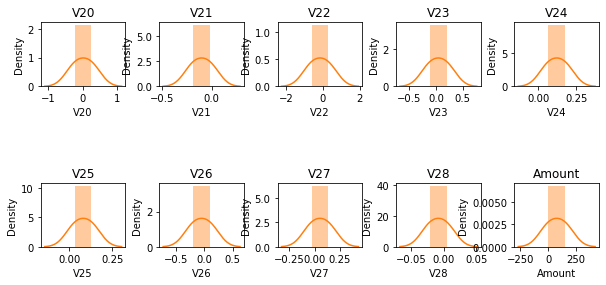

In [19]:
plot_fraud_genuine(best_features, dataset)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\ProgramData\Anaconda3\lib\si

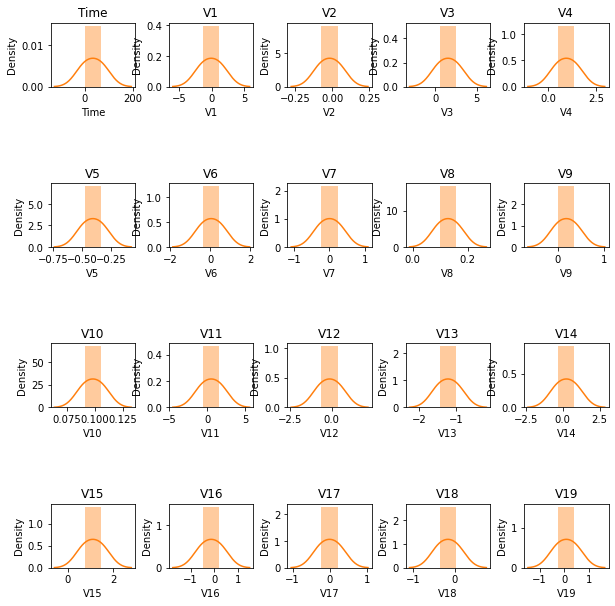

In [20]:
plot_fraud_genuine(bad_features, dataset)

In [21]:
#split into train and test using sklearn lib

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
# now we use eklearn lib foor cross validation in order to make more general 'cause of number of fraudent transactions is low
nb=GaussianNB()
cv_results=cross_validate(nb,x_train,y_train,cv=10,
                         scoring='recall',
                         return_train_score=True,
                         return_estimator=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being se

In [23]:
print('Traning scores from each fold : ', cv_results['train_score'])
max_score_index=np.argmax(cv_results['train_score'])
best_estimator=cv_results['estimator'][max_score_index]

Traning scores from each fold :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
#for ploting confusion matrix

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title=None,
                         cmap=plt.cm.Blues):
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    #we want to show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           
           # and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True Label',
           xlabel='Predicted Label')
    
    # rotate the tick labels and set the alignments
    ply.setp(ax.get_xticklabels(),
            rotation=45,
            ha='right',
            rotation_mode='anchor')
    
    #loop over data dimentions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i,j], fmt),
                   ha="center",  va="center",
                   color="white" if cm[i,j] > thresh else "black")
            fig.tight_layout()
            return ax
        
        
        

In [31]:
#define the function to display the result
def display_results(estimator,x,y):
    predicted=estimator.predict(x)
    cm=confusion_matrix(y,predicted)
    report = classification_report(y,predicted)
    print(report)
    plot_confusion_matrix(cm,classes=['Genuine', 'fraud'], title='fraud detection')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

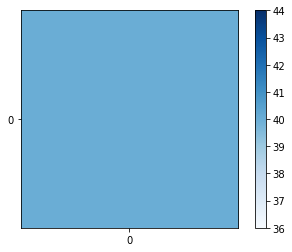

In [32]:
display_results(best_estimator,x_test,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

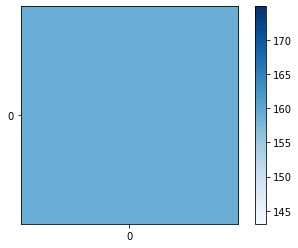

In [33]:
display_results(best_estimator,x_train,y_train)